In [ ]:
from google.colab import files
files.upload()

Saving heart_disease_data.csv to heart_disease_data.csv


{'heart_disease_data.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


1 => effected in heart disease
0 => not effected

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
X = df.drop(columns='target', axis=1)
y = df['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
df.shape

(303, 14)

In [ ]:
ss = StandardScaler()
s_x = ss.fit_transform(X)
print(s_x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [ ]:
X = s_x
y = y

In [ ]:
print(X,y)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]] 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, stratify=y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (272, 13) (31, 13)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_X_train = model.predict(X_train)
print(pred_X_train)

[1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 0 1 1]


In [ ]:
accuracy = accuracy_score(pred_X_train, y_train)
print(f'Accuracy score of pred_X_train and y_train is {accuracy}')

Accuracy score of pred_X_train and y_train is 0.8566176470588235


In [ ]:
pred_X_test = model.predict(X_test)
print(pred_X_test.shape, y_test.shape)
print(pred_X_test,"\n", y_test)

(31,) (31,)
[1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0] 
 172    0
97     1
237    0
139    1
51     1
187    0
107    1
59     1
269    0
255    0
1      1
240    0
111    1
185    0
122    1
80     1
298    0
105    1
88     1
145    1
92     1
135    1
63     1
208    0
228    0
86     1
196    0
8      1
180    0
212    0
260    0
Name: target, dtype: int64


In [ ]:
accuracy = accuracy_score(pred_X_test, y_test)
print(f'Accuracy score of pred_X_train and y_train is {accuracy}')

Accuracy score of pred_X_train and y_train is 0.7419354838709677


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data = []
for col in df.columns:
  if col == 'target':
    break
  value = float(input(f'Enter value of {col} ='))
  data.append(value)
print(data)

Enter value of age =12
Enter value of sex =12
Enter value of cp =2
Enter value of trestbps =


ValueError: could not convert string to float: ''

In [ ]:
# data = [64,1,3,110,211,0,0,144,1,1.8,1,0,2]
# => 1
# data = [60,1,0,130,253,0,1,144,1,1.4,2,1,3]
# data=[64,1,3,110,211,0,0,144,1,1.8,1,0,2]
# data = [0,1,12,4,56,1,3,4,9,3,4,5,6]
# => 0
# data = [42,1,0,136,315,0,1,125,1,1.8,1,0,1]
# data = [46,1,0,140,311,0,1,120,1,1.8,1,2,3]
# data = [57,1,0,110,335,0,1,143,1,3,1,1,3]

data_array = np.asarray(data)
data_array_reshaped = data_array.reshape(1,-1)

ss_data = ss.transform(data_array_reshaped)

pred_data_array_reshaped = model.predict(ss_data)
print(pred_data_array_reshaped)

if pred_data_array_reshaped[0] == 0:
  print('The person does not have a heart disease')
else:
  print('The person has a heart disease')

[1]
The person has a heart disease


In [ ]:
print(accuracy_score(pred_X_test, y_test))
print(mean_absolute_error(pred_X_test, y_test))
print(mean_squared_error(pred_X_test, y_test))
print(r2_score(pred_X_test, y_test))

0.7419354838709677
0.25806451612903225
0.25806451612903225
-0.04201680672268937


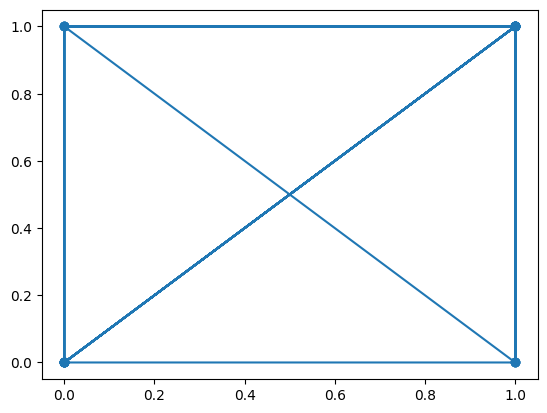

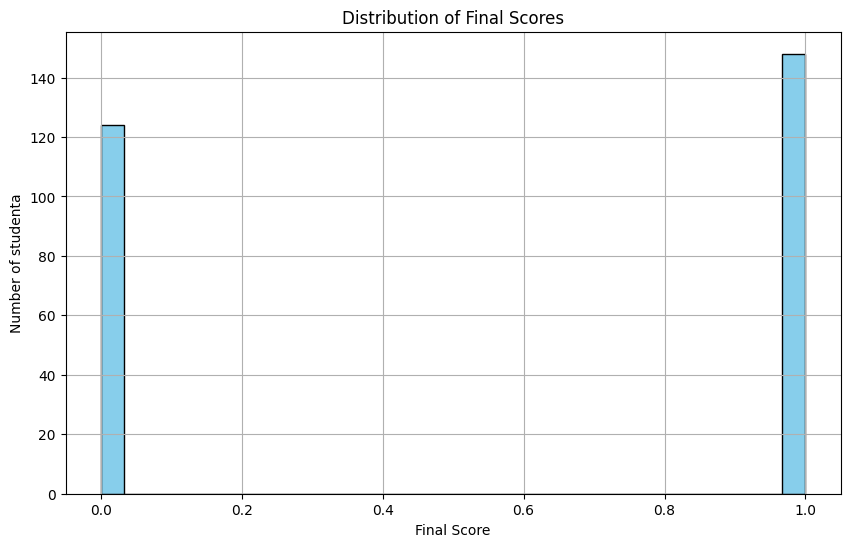

In [ ]:
# scatter
# line

plt.scatter(pred_X_test, y_test)
plt.plot(pred_X_test, y_test)
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Final Score')
plt.ylabel('Number of studenta')
plt.title('Distribution of Final Scores')
plt.grid(True)
plt.show()